<a href="https://colab.research.google.com/github/JPerryWinsor/MATH152/blob/main/P4M_Notebook_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 3:  Lists

Python provides a powerful set of tools to create and manipulate lists of data. In this part, we take a deep dive into the Python list type.  This includes mutability, list methods, and slicing.


Then we use Python lists to implement and optimize the Sieve of Eratosthenes, which will produce a list of all prime numbers up to a big number (like 10 million) in a snap. Along the way, we introduce some Python techniques for data analysis and visualization.

## Primality testing

Before diving into lists, we recall the **brute force** primality test that we created in the last lesson.  To test whether a number `n` is prime, we can simply check for factors.  This yields the following primality test.

In [ ]:
def is_prime(n):
    '''
    Checks whether the argument n is a prime number.
    Uses a brute force search for factors between 1 and n.
    '''
    for j in range(2,n):  # the range of numbers 2,3,...,n-1.
        if n%j == 0:  # is n divisible by j?
            print("{} is a factor of {}.".format(j,n))
            return False
    return True

We can also implement this test with a **while loop** instead of a for loop.  This doesn't make much of a difference, in Python 3.x.  (In Python 2.x, this would save memory).

In [ ]:
def is_prime(n):
    '''
    Checks whether the argument n is a prime number.
    Uses a brute force search for factors between 1 and n.
    '''
    j = 2
    while j < n:  # j will proceed through the list of numbers 2,3,...,n-1.
        if n%j == 0:  # is n divisible by j?
            print("{} is a factor of {}.".format(j,n))
            return False
        j = j + 1  # There's a Python abbreviation for this:  j += 1.
    return True

In [ ]:
is_prime(10001)

73 is a factor of 10001.


False

In [ ]:
is_prime(101)

True

If $n$ is a prime number, then the `is_prime(n)` function will iterate through all the numbers between $2$ and $n-1$.  But this is overkill!  Indeed, if $n$ is not prime, it will have a factor between $2$ and the square root of $n$.  This is because factors come in pairs:  if $ab = n$, then one of the factors, $a$ or $b$, must be less than or equal to the square root of $n$.  So it suffices to search for factors up to (and including) the square root of $n$.

Even though we've made our own sqrt function, we load a fast one from the [standard math package](https://docs.python.org/3/library/math.html).  You can use this for square roots, trig functions, logs, and more.  Click the previous link for documentation.  This package doesn't load automatically when you start Python, so you have to load it with a little Python code.

In [ ]:
from math import sqrt

This command **imports** the square root function (`sqrt`) from the **package** called `math`.  Now you can find square roots.

In [ ]:
sqrt(1000)

31.622776601683793

There are a few different ways to import functions from packages.  The above syntax is a good starting point, but sometimes problems can arise if different packages have functions with the same name.  Here are a few methods of importing the `sqrt` function and how they differ.

`from math import sqrt`:  After this command, `sqrt` will refer to the function from the `math` package (overriding any previous definition).

`import math`:  After this command, all the functions from the `math` package will be imported.  But to call `sqrt`, you would type a command like `math.sqrt(1000)`.  This is convenient if there are potential conflicts with other packages.

`from math import *`:  After this command, all the functions from the `math` package will be imported.  To call them, you can access them directly with a command like `sqrt(1000)`.  This can easily cause conflicts with other packages, since packages can have hundreds of functions in them!

`import math as mth`:  Some people like abbreviations.  This imports all the functions from the `math` package.  To call one, you type a command like `mth.sqrt(1000)`. 

In [ ]:
import math

In [ ]:
math.sqrt(1000)

31.622776601683793

In [ ]:
factorial(10)  # This will cause an error!

NameError: ignored

In [ ]:
math.factorial(10)  # This is ok, since the math package comes with a function called factorial.

3628800

Now let's improve our `is_prime(n)` function by searching for factors only up to the square root of the number `n`.  We consider two options.

In [ ]:
def is_prime_slow(n):
    '''
    Checks whether the argument n is a prime number.
    Uses a brute force search for factors between 1 and n.
    '''
    j = 2
    while j <= sqrt(n):  # j will proceed through the list of numbers 2,3,... up to sqrt(n).
        if n%j == 0:  # is n divisible by j?
            print("{} is a factor of {}.".format(j,n))
            return False
        j = j + 1  # There's a Python abbreviation for this:  j += 1.
    return True

In [ ]:
def is_prime_fast(n):
    '''
    Checks whether the argument n is a prime number.
    Uses a brute force search for factors between 1 and n.
    '''
    j = 2
    root_n = sqrt(n)
    while j <= root_n:  # j will proceed through the list of numbers 2,3,... up to sqrt(n).
        if n%j == 0:  # is n divisible by j?
            #print("{} is a factor of {}.".format(j,n))
            return False
        j = j + 1  # There's a Python abbreviation for this:  j += 1.
    return True

In [ ]:
is_prime_fast(1000003)

True

In [ ]:
is_prime_slow(1000003)

True

I've chosen function names with "fast" and "slow" in them.  But what makes them faster or slower?  Are they faster than the original?  And how can we tell?

Python comes with a great set of tools for these questions.  The simplest (for the user) are the time utilities.  By placing the **magic** `%timeit` before a command, Python does something like the following:

1.  Python makes a little container in your computer devoted to the computations, to avoid interference from other running programs if possible.
2.  Python executes the command lots and lots of times.
3.  Python averages the amount of time taken for each execution.  

Give it a try below, to compare the speed of the functions `is_prime` (the original) with the new `is_prime_fast` and `is_prime_slow`.  Note that the `%timeit` commands might take a little while.

In [ ]:
%timeit is_prime_fast(1000003)

10000 loops, best of 3: 115 µs per loop


In [ ]:
%timeit is_prime_slow(1000003)

10000 loops, best of 3: 155 µs per loop


In [ ]:
%timeit is_prime(1000003)

10 loops, best of 3: 102 ms per loop


Time is measured in seconds, milliseconds (1 ms = 1/1000 second), microseconds (1 µs = 1/1,000,000 second), and nanoseconds (1 ns = 1/1,000,000,000 second).  So it might appear at first that `is_prime` is the fastest, or about the same speed.  But check the units!  The other two approaches are about a thousand times faster!  How much faster were they on your computer?

In [ ]:
is_prime_fast(10000000000037)  # Don't try this with `is_prime` unless you want to wait for a long time!

True

Indeed, the `is_prime_fast(n)` function will go through a loop of length about `sqrt(n)` when `n` is prime.  But `is_prime(n)` will go through a loop of length about `n`.  Since `sqrt(n)` is much less than `n`, especially when `n` is large, the `is_prime_fast(n)` function is much faster.

Between `is_prime_fast` and `is_prime_slow`, the difference is that the `fast` version **precomputes** the square root `sqrt(n)` before going through the loop, where the `slow` version repeats the `sqrt(n)` every time the loop is repeated.  Indeed, writing `while j <= sqrt(n):` suggests that Python might execute `sqrt(n)` every time to check.  This *might* lead to Python computing the same square root a million times... unnecessarily!  

A basic principle of programming is to **avoid repetition**.  If you have the memory space, just compute once and store the result.  It will probably be faster to pull the result out of memory than to compute it again.

Python does tend to be pretty smart, however.  It's possible that Python **is precomputing** `sqrt(n)` even in the slow loop, just because it's clever enough to tell in advance that the same thing is being computed over and over again.  This depends on your Python version and takes place behind the scenes.  If you want to figure it out, there's a whole set of tools (for advanced programmers) like the [disassembler](https://docs.python.org/3/library/dis.html) to figure out what Python is doing.

If you feel like looking under the hood, the next few lines will display the `is_prime_fast` and `is_prime_slow` functions to bytecode.  Can you see how the `sqrt(n)` computation is carried out differently?

In [ ]:
from dis import dis

In [ ]:
dis(is_prime_fast)

In [ ]:
dis(is_prime_slow)

In [ ]:
is_prime_fast(10**14 + 37) # This might get a bit of delay.

1858741 is a factor of 100000000000037.


False

Now we have a function `is_prime_fast(n)` that is speedy for numbers `n` in the trillions!  You'll probably start to hit a delay around $10^{15}$ or so, and the delays will become intolerable if you add too many more digits.  In a future lesson, we will see a different primality test that will be essentially instant even for numbers around $10^{1000}$!  

### Exercises

####1.
To check whether a number `n` is prime, you can first check whether `n` is even, and then check whether `n` has any odd factors.  Change the `is_prime_fast` function by implementing this improvement.  How much of a speedup did you get?


In [ ]:
def is_prime_fast(n):
    if n%2 == 0 and n!= 2:
      return False
    j = 3
    root_n = sqrt(n)
    while j <= root_n:  # j will proceed through the list of numbers 2,3,... up to sqrt(n).
        if n%j == 0:  # is n divisible by j?
            #print("{} is a factor of {}.".format(j,n))
            return False
        j = j + 2  # There's a Python abbreviation for this:  j += 1.
    return True

In [ ]:
is_prime_fast(2)

True

In [ ]:
is_prime_fast(10000000000037)

True

In [ ]:
%timeit is_prime_fast(1000003)

10000 loops, best of 3: 57.9 µs per loop


The new function seems to be about twice as fast as the old one, which would make sense, since it's checking half the numbers.

####2.
Use the `%timeit` tool to study the speed of `is_prime_fast` for various sizes of `n`.  Using about 10 data points, relate the size of `n` to the time taken by the `is_prime_fast` function.

Below, I used %timeit for powers of 10 + 1. Though there was some variation in the timing, likely due to returning False sooner. There is a general positve correlation between the size of n and the time spend. If I ran it for only prime numbers, the relation would likely show to be proportional to sqrt(n)/2, since that is the length of the while loop.

#####Tests

In [ ]:
%timeit is_prime_fast(11)

The slowest run took 15.16 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 296 ns per loop


In [ ]:
%timeit is_prime_fast(101)

The slowest run took 8.95 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 606 ns per loop


In [ ]:
%timeit is_prime_fast(1001)

The slowest run took 12.48 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 429 ns per loop


In [ ]:
%timeit is_prime_fast(10**4+1)

100000 loops, best of 3: 3.65 µs per loop


In [ ]:
%timeit is_prime_fast(10**5+1)

The slowest run took 7.19 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 640 ns per loop


In [ ]:
%timeit is_prime_fast(10**6+1)

100000 loops, best of 3: 4.96 µs per loop


In [ ]:
%timeit is_prime_fast(10**7+1)

The slowest run took 8.44 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 642 ns per loop


In [ ]:
%timeit is_prime_fast(10**8+1)

The slowest run took 6.35 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 947 ns per loop


In [ ]:
%timeit is_prime_fast(10**9+1)

The slowest run took 13.44 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 431 ns per loop


In [ ]:
%timeit is_prime_fast(10**10+1)

100000 loops, best of 3: 7.08 µs per loop


####3.
Write a function `is_square(n)` to test whether a given integer `n` is a perfect square (like 0, 1, 4, 9, 16, etc.).  How fast can you make it run?  Describe the different approaches you try and which are fastest.

In [ ]:
def is_square(n):
  if sqrt(n) == sqrt(n)//1:
    return True
  else:
    return False

Above is my final function. It checks if the sqrt of n is an int. Since sqrt returns an mpfloat, I need to check it a bit differently. The other type I tried used a while loop that finds the first square greater than or equal to n, then checks if that square is n. This approach was, predictably, slower, but it doesn't use sqrt.
I have two versios of the final function, for int(sqrt(n)) and sqrt(n)//1. The latter seemed slightly faster after running the block a few times. 

#####Tests

In [ ]:
def is_square(n):
  x = 1
  while x**2 < n:
    x += 1
  if x**2 == n:
    return True
  else:
    return False 

In [ ]:
%timeit(is_square(15))

1000000 loops, best of 3: 1.32 µs per loop


In [ ]:
def is_square2(n):
  if sqrt(n) == int(sqrt(n)):
    return True
  else:
    return False

In [ ]:
%timeit(is_square2(15))

The slowest run took 12.72 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 323 ns per loop


In [ ]:
def is_square3(n):
  if sqrt(n) == sqrt(n)//1:
    return True
  else:
    return False

In [ ]:
%timeit(is_square3(15))

The slowest run took 19.67 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 313 ns per loop


## List manipulation

We have already (briefly) encountered the `list` type in Python.  Recall that the `range` command produces a range, which can be used to produce a list.  For example, `list(range(10))` produces the list `[0,1,2,3,4,5,6,7,8,9]`.  You can also create your own list by a writing out its terms, e.g. `L = [4,7,10]`.

Here we work with lists, and a very Pythonic approach to list manipulation.  With practice, this can be a powerful tool to write fast algorithms, exploiting the hard-wired capability of your computer to shift and slice large chunks of data.  Our eventual application will be to implement the Sieve of Eratosthenes, producing a long list of prime numbers (without using any `is_prime` test along the way).

We begin by creating a list to play with.  We mix numbers and strings... just for fun.

In [ ]:
L = [0,'one',2,'three',4,'five',6,'seven',8,'nine',10]

### List terms and indices

Notice that the entries in a list can be of any type.  The above list `L` has some integer entries and some string entries.  Lists are **ordered** in Python, **starting at zero**.  One can access the $n^{th}$ entry in a list with a command like `L[n]`.  

In [ ]:
L[3]

'three'

In [ ]:
print(L[3])  # Note that Python has slightly different approaches to the print-function, and the output above.

three


In [ ]:
print(L[4])  # We will use the print function, because it makes our printing intentions clear.

4


In [ ]:
print(L[0])

0


The location of an entry is called its **index**.  So *at* the index 3, the list `L` stores the entry `three`.  Note that the same entry can occur in many places in a list.  E.g. `[7,7,7]` is a list with 7 at the zeroth, first, and second index.

In [ ]:
print(L[-1])
print(L[-2])

10
nine


The last bit of code demonstrates a cool Python trick.  The "-1st" entry in a list refers to the last entry. The "-2nd entry" refers to the second-to-last entry, and so on.  It gives a convenient way to access both sides of the list, even if you don't know how long it is.

Of course, you can use Python to find out how long a list is.

In [ ]:
len(L)

11

You can also use Python to find the sum of a list of numbers.

In [ ]:
sum([1,2,3,4,5])

15

In [ ]:
sum(range(100))  # Be careful.  This is the sum of which numbers?  # The sum function can take lists or ranges.

4950

### List slicing

**Slicing** lists allows us to create new lists (or ranges) from old lists (or ranges), by chopping off one end or the other, or even slicing out entries at a fixed interval.  The simplest syntax has the form `L[a:b]` where `a` denotes the index of the starting entry and index of the final entry is one less than `b`.  It is best to try a few examples to get a feel for it.

Slicing a list with a command like `L[a:b]` doesn't actually *change* the original list `L`.  It just extracts some terms from the list and outputs those terms.  Soon enough, we will change the list `L` using a list assignment.

In [ ]:
L[0:5]

[0, 'one', 2, 'three', 4]

In [ ]:
L[5:11]  # Notice that L[0:5] and L[5:11] together recover the whole list.

['five', 6, 'seven', 8, 'nine', 10]

In [ ]:
L[3:7]

['three', 4, 'five', 6]

This continues the strange (for beginners) Python convention of starting at the first number and ending just before the last number.  Compare to `range(3,7)`, for example.  

The command `L[0:5]` can be replaced by `L[:5]` to abbreviate.  The empty opening index tells Python to start at the beginning.  Similarly, the command `L[5:11]` can be replaced by `L[5:]`.  The empty closing index tells Python to end the slice and the end.  This is helpful if one doesn't know where the list ends.

In [ ]:
L[:5]

[0, 'one', 2, 'three', 4]

In [ ]:
L[3:]

['three', 4, 'five', 6, 'seven', 8, 'nine', 10]

Just like the `range` command, list slicing can take an optional third argument to give a step size.  To understand this, try the command below.

In [ ]:
L[2:10]

[2, 'three', 4, 'five', 6, 'seven', 8, 'nine']

In [ ]:
L[2:10:3]

[2, 'five', 8]

If, in this three-argument syntax, the first or second argument is absent, then the slice starts at the beginning of the list or ends at the end of the list accordingly.

In [ ]:
L  # Just a reminder.  We haven't modified the original list!

[0, 'one', 2, 'three', 4, 'five', 6, 'seven', 8, 'nine', 10]

In [ ]:
L[:9:3]  # Start at zero, go up to (but not including) 9, by steps of 3.

[0, 'three', 6]

In [ ]:
L[2: :3] # Start at two, go up through the end of the list, by steps of 3.

[2, 'five', 8]

In [ ]:
L[::3]  # Start at zero, go up through the end of the list, by steps of 3.

[0, 'three', 6, 'nine']

### Changing list slices

Not only can we extract and study terms or slices of a list, we can change them by assignment.  The simplest case would be changing a single term of a list.

In [ ]:
print(L) # Start with the list L.

[0, 'one', 2, 'three', 4, 'five', 6, 'seven', 8, 'nine', 10]


In [ ]:
L[5] = 'Bacon!'

In [ ]:
print(L)  # What do you think L is now?

[0, 'one', 2, 'three', 4, 'Bacon!', 6, 'seven', 8, 'nine', 10]


In [ ]:
print(L[2::3]) # What do you think this will do?

[2, 'Bacon!', 8]


We can change an entire slice of a list with a single assignment.  Let's change the first two terms of `L` in one line.

In [ ]:
L[:2] = ['Pancakes', 'Ham']  # What was L[:2] before?

In [ ]:
print(L) # Oh... what have we done!

['Pancakes', 'Ham', 2, 'three', 4, 'Bacon!', 6, 'seven', 8, 'nine', 10]


In [ ]:
L[0]

'Pancakes'

In [ ]:
L[1]

'Ham'

In [ ]:
L[2]

2

We can change a slice of a list with a single assignment, even when that slice does not consist of consecutive terms.  Try to predict what the following commands will do.

In [ ]:
print(L)  # Let's see what the list looks like before.

['Pancakes', 'Ham', 2, 'three', 4, 'Bacon!', 6, 'seven', 8, 'nine', 10]


In [ ]:
L[::2] = ['A','B','C','D','E','F']  # What was L[::2] before this assignment? 

In [ ]:
print(L)  # What do you predict?

['A', 'Ham', 'B', 'three', 'C', 'Bacon!', 'D', 'seven', 'E', 'nine', 'F']


## List methods

A method is a function that is attached to an object.  We have already used one method:  the `format` method that is attached to all strings.  You might have seen the `replace` method for strings too.  Note that single-quotes `'Hello'` or double-quotes `"Hello"` can be used for strings.

In [ ]:
"Hello {}!".format('programming student')

'Hello programming student!'

In [ ]:
"Programming is fun!".replace('fun','lit')

'Programming is lit!'

List methods are functions attached to lists.  Some useful methods include `append` and `sort`.  A fuller listing can be found at [the official documentation](https://docs.python.org/3/tutorial/datastructures.html).

In [ ]:
L = [1,2,3]
L.append(4)
print(L)

[1, 2, 3, 4]


The `append` method can be used to add new items to the end of a list.  But be careful if you want to add multiple items!

In [ ]:
L.append([5,6])
print(L)

[1, 2, 3, 4, [5, 6]]


Behind the scenes, methods are functions which have a special input parameter called `self`.  So when you use a command like `L.append(4)`, you are effectively running `append(L, 4)`.  The `self` parameter is the object the method is attached to.

Like all functions, methods have outputs too.  But what can be confusing is that methods can *modify* `self` and can sometimes *return* `None`.  

In [ ]:
print([1,2,3].append(4))
print("123".replace("3","4"))

None
124


This is very confusing at first!  The list `append` method *does* change `self` by appending something to `self`.  But as a function, it returns `None`.  

On the other hand, the string `replace` method *does not* change `self` and instead *returns* the modified string.

This will make more sense after we study *mutable* and *immutable* types.  Lists are mutable (and thus are often changed by their methods).  Strings are immutable, and so changes are effected by producing new strings.  Another example of a string method is `sort()`.  The only parameter of `sort` is `self`, and so nothing needs to go between the paraentheses.

In [ ]:
L = [4,2,1]  # Make a list.
L.sort()  # Sort the list.  This *changes* L and returns None.
print(L)  # Let's see what L is now.

[1, 2, 4]


In [ ]:
L = ['Ukelele', 'Apple', 'Dog', 'Cat' ]
L.sort()
print(L)

['Apple', 'Cat', 'Dog', 'Ukelele']


Sorting numbers is possible, because the Python operator `<` is defined for numbers.  Sorting strings is possible, because the Python operator `<` is interpreted alphabetically among strings.  If you mix types, Python might not know how to behave... you'll get a TypeError.

In [ ]:
L = [1,'Apple', 3.14]
L.sort()
print(L)

TypeError: ignored

### Exercises

####1.
Create a list L with L = [1,2,3,...,100] (all the numbers from 1 to 100).  What is L[50]?

L should be 51.

In [ ]:
L = list(range(1,101))
L[50]

51

####2.
Take the same list L, and extract a slice of the form [5,10,15,...,95] with a command of the form L[a:b:c].

In [ ]:
L[4:95:5]

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

####3.
Take the same list L, and change all the even numbers to zeros, so that L looks like [1,0,3,0,5,0,...,99,0].  Hint:  You might wish to use the list [0]*50.

In [ ]:
L[1: :2]=[0]*50
L

[1,
 0,
 3,
 0,
 5,
 0,
 7,
 0,
 9,
 0,
 11,
 0,
 13,
 0,
 15,
 0,
 17,
 0,
 19,
 0,
 21,
 0,
 23,
 0,
 25,
 0,
 27,
 0,
 29,
 0,
 31,
 0,
 33,
 0,
 35,
 0,
 37,
 0,
 39,
 0,
 41,
 0,
 43,
 0,
 45,
 0,
 47,
 0,
 49,
 0,
 51,
 0,
 53,
 0,
 55,
 0,
 57,
 0,
 59,
 0,
 61,
 0,
 63,
 0,
 65,
 0,
 67,
 0,
 69,
 0,
 71,
 0,
 73,
 0,
 75,
 0,
 77,
 0,
 79,
 0,
 81,
 0,
 83,
 0,
 85,
 0,
 87,
 0,
 89,
 0,
 91,
 0,
 93,
 0,
 95,
 0,
 97,
 0,
 99,
 0]

####4.
Try the command `L[-1::-1]` on a list.  What does it do?  Can you guess before executing it?  Can you understand why?  In fact, strings are indexed like lists.  Try setting `L = 'Hello'` and the previous command.

I'd say it reverses the list, since [-1: : ] represents the last element and [ : :-1] represents moving in reverse.

In [ ]:
L[-1: :-1]

[0,
 99,
 0,
 97,
 0,
 95,
 0,
 93,
 0,
 91,
 0,
 89,
 0,
 87,
 0,
 85,
 0,
 83,
 0,
 81,
 0,
 79,
 0,
 77,
 0,
 75,
 0,
 73,
 0,
 71,
 0,
 69,
 0,
 67,
 0,
 65,
 0,
 63,
 0,
 61,
 0,
 59,
 0,
 57,
 0,
 55,
 0,
 53,
 0,
 51,
 0,
 49,
 0,
 47,
 0,
 45,
 0,
 43,
 0,
 41,
 0,
 39,
 0,
 37,
 0,
 35,
 0,
 33,
 0,
 31,
 0,
 29,
 0,
 27,
 0,
 25,
 0,
 23,
 0,
 21,
 0,
 19,
 0,
 17,
 0,
 15,
 0,
 13,
 0,
 11,
 0,
 9,
 0,
 7,
 0,
 5,
 0,
 3,
 0,
 1]

In [ ]:
L = 'Hello'
L[-1: :-1]

'olleH'

####5.
Create the list [1,100,3,98,5,96,...,99,2], where the odd terms are in order and the even terms are in reverse order.  There are multiple methods!

In [ ]:
L = list(range(1,101))
L[1:100:2]=L[-1: :-2]
L

[1,
 100,
 3,
 98,
 5,
 96,
 7,
 94,
 9,
 92,
 11,
 90,
 13,
 88,
 15,
 86,
 17,
 84,
 19,
 82,
 21,
 80,
 23,
 78,
 25,
 76,
 27,
 74,
 29,
 72,
 31,
 70,
 33,
 68,
 35,
 66,
 37,
 64,
 39,
 62,
 41,
 60,
 43,
 58,
 45,
 56,
 47,
 54,
 49,
 52,
 51,
 50,
 53,
 48,
 55,
 46,
 57,
 44,
 59,
 42,
 61,
 40,
 63,
 38,
 65,
 36,
 67,
 34,
 69,
 32,
 71,
 30,
 73,
 28,
 75,
 26,
 77,
 24,
 79,
 22,
 81,
 20,
 83,
 18,
 85,
 16,
 87,
 14,
 89,
 12,
 91,
 10,
 93,
 8,
 95,
 6,
 97,
 4,
 99,
 2]

The question asked for the list to end in 0, but I'm going to assume it meant for it to end in 2.

####6.
Use the append method with a loop to create a list of perfect squares, [0,1,4,9,16,25,...,10000].

In [ ]:
L=[]
for x in range(0,101):
  L.append(x**2)
L

[0,
 1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625,
 676,
 729,
 784,
 841,
 900,
 961,
 1024,
 1089,
 1156,
 1225,
 1296,
 1369,
 1444,
 1521,
 1600,
 1681,
 1764,
 1849,
 1936,
 2025,
 2116,
 2209,
 2304,
 2401,
 2500,
 2601,
 2704,
 2809,
 2916,
 3025,
 3136,
 3249,
 3364,
 3481,
 3600,
 3721,
 3844,
 3969,
 4096,
 4225,
 4356,
 4489,
 4624,
 4761,
 4900,
 5041,
 5184,
 5329,
 5476,
 5625,
 5776,
 5929,
 6084,
 6241,
 6400,
 6561,
 6724,
 6889,
 7056,
 7225,
 7396,
 7569,
 7744,
 7921,
 8100,
 8281,
 8464,
 8649,
 8836,
 9025,
 9216,
 9409,
 9604,
 9801,
 10000]

####7.
Create a list of 52 "cards" to resemble a standard card deck.  The suits can be denoted C,S,D,H for clubs, spades, diamonds, and hearts.  The numbers can be denoted 1-13 (with Ace = 1, Jack = 11, Queen = 12, King = 13).  So "9H" would be the 9 of hearts, and 12S the queen of spades.  Your list L should contain every card.

In [ ]:
Suits = ['C','S','D','H']
mydeck = []
for S in Suits:
  for n in range(1,14):
    mydeck.append('{}{}'.format(S,n))
mydeck


['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'S1',
 'S2',
 'S3',
 'S4',
 'S5',
 'S6',
 'S7',
 'S8',
 'S9',
 'S10',
 'S11',
 'S12',
 'S13',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'H1',
 'H2',
 'H3',
 'H4',
 'H5',
 'H6',
 'H7',
 'H8',
 'H9',
 'H10',
 'H11',
 'H12',
 'H13']

####8.
Challenge:  write a function which performs a "perfect riffle shuffle" on a list of cards.  This shuffle should have the effect of dividing the deck into two equal pieces, and then precisely interlacing the two pieces to form a new list.  E.g., an input list of `[1,2,3,4,5,6]` should be broken into `[1,2,3]` and `[4,5,6]` and then interlaced as `[1,4,2,5,3,6]`.

In [ ]:
def riffleshuffle(L):
  if len(L)%2 == 0:
    L1 = L[:len(L)//2]
    L2 = L[len(L)//2:]
  else: #runs if length is odd  
    L1 = L[:len(L)//2+1]
    L2 = L[len(L)//2+1:]
  L = [None for l in L]
  L[ : :2] = L1
  L[1: :2] = L2
  return L

#or, without breaking the list up:

def riffleshuffle(L):
  if len(L)%2 == 0:
    L[1: :2] = L[len(L)//2:]
  else: # runs if length is odd
    L[1: :2] = L[len(L)//2+1:]
  return L

In [ ]:
riffleshuffle([1,2,3,4,5,6])

[1, 4, 3, 5, 5, 6]

In [ ]:
riffleshuffle([1,2,3,4,5])

[1, 4, 2, 5, 3]

In [ ]:
riffleshuffle(mydeck)

['C1',
 'D1',
 'C2',
 'D2',
 'C3',
 'D3',
 'C4',
 'D4',
 'C5',
 'D5',
 'C6',
 'D6',
 'C7',
 'D7',
 'C8',
 'D8',
 'C9',
 'D9',
 'C10',
 'D10',
 'C11',
 'D11',
 'C12',
 'D12',
 'C13',
 'D13',
 'S1',
 'H1',
 'S2',
 'H2',
 'S3',
 'H3',
 'S4',
 'H4',
 'S5',
 'H5',
 'S6',
 'H6',
 'S7',
 'H7',
 'S8',
 'H8',
 'S9',
 'H9',
 'S10',
 'H10',
 'S11',
 'H11',
 'S12',
 'H12',
 'S13',
 'H13']

In [ ]:
for x in range(100):
  mydeck = riffleshuffle(mydeck)
mydeck

['C1',
 'S4',
 'D7',
 'H10',
 'S1',
 'D4',
 'H7',
 'C11',
 'D1',
 'H4',
 'C8',
 'S11',
 'H1',
 'C5',
 'S8',
 'D11',
 'C2',
 'S5',
 'D8',
 'H11',
 'S2',
 'D5',
 'H8',
 'C12',
 'D2',
 'H5',
 'C9',
 'S12',
 'H2',
 'C6',
 'S9',
 'D12',
 'C3',
 'S6',
 'D9',
 'H12',
 'S3',
 'D6',
 'H9',
 'C13',
 'D3',
 'H6',
 'C10',
 'S13',
 'H3',
 'C7',
 'S10',
 'D13',
 'C4',
 'S7',
 'D10',
 'H13']

## Sieve of Eratosthenes

The **Sieve of Eratosthenes** (hereafter called "the sieve") is a very fast way of producing long lists of primes, without doing repeated primality checking.  The basic idea is to start with all of the natural numbers, and successively filter out, or [**sieve**](https://en.wikipedia.org/wiki/Sieve), the multiples of 2, then the multiples of 3, then the multiples of 5, etc., until only primes are left.  You can read more about the sieve, and experimental number theory, at [The Conversation](https://theconversation.com/why-prime-numbers-still-fascinate-mathematicians-2-300-years-later-92484)

Using list slicing, we can carry out this sieving process efficiently.  And with a few more tricks we encounter here, we can carry out the Sieve **very** efficiently.

### The basic sieve

The first approach we introduce is a bit naive, but is a good starting place.  We will begin with a list of numbers up to 100, and sieve out the appropriate multiples of 2,3,5,7.

In [ ]:
primes = list(range(100)) # Let's start with the numbers 0...99.

Now, to "filter", i.e., to say that a number is *not* prime, let's just change the number to the value `None`.  

In [ ]:
primes[0] = None # Zero is not prime.
primes[1] = None # One is not prime.
print(primes) # What have we done?

[None, None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


Now let's filter out the multiples of 2, starting at 4.  This is the slice `primes[4::2]`

In [ ]:
primes[4::2] = [None] * len(primes[4::2])  # The right side is a list of Nones, of the necessary length.
print(primes) # What have we done?

[None, None, 2, 3, None, 5, None, 7, None, 9, None, 11, None, 13, None, 15, None, 17, None, 19, None, 21, None, 23, None, 25, None, 27, None, 29, None, 31, None, 33, None, 35, None, 37, None, 39, None, 41, None, 43, None, 45, None, 47, None, 49, None, 51, None, 53, None, 55, None, 57, None, 59, None, 61, None, 63, None, 65, None, 67, None, 69, None, 71, None, 73, None, 75, None, 77, None, 79, None, 81, None, 83, None, 85, None, 87, None, 89, None, 91, None, 93, None, 95, None, 97, None, 99]


Now we filter out the multiples of 3, starting at 9.

In [ ]:
primes[9::3] = [None] * len(primes[9::3])  # The right side is a list of Nones, of the necessary length.
print(primes) # What have we done?

[None, None, 2, 3, None, 5, None, 7, None, None, None, 11, None, 13, None, None, None, 17, None, 19, None, None, None, 23, None, 25, None, None, None, 29, None, 31, None, None, None, 35, None, 37, None, None, None, 41, None, 43, None, None, None, 47, None, 49, None, None, None, 53, None, 55, None, None, None, 59, None, 61, None, None, None, 65, None, 67, None, None, None, 71, None, 73, None, None, None, 77, None, 79, None, None, None, 83, None, 85, None, None, None, 89, None, 91, None, None, None, 95, None, 97, None, None]


Next the multiples of 5, starting at 25 (the first multiple of 5 greater than 5 that's left!)

In [ ]:
primes[25::5] = [None] * len(primes[25::5])  # The right side is a list of Nones, of the necessary length.
print(primes) # What have we done?

[None, None, 2, 3, None, 5, None, 7, None, None, None, 11, None, 13, None, None, None, 17, None, 19, None, None, None, 23, None, None, None, None, None, 29, None, 31, None, None, None, None, None, 37, None, None, None, 41, None, 43, None, None, None, 47, None, 49, None, None, None, 53, None, None, None, None, None, 59, None, 61, None, None, None, None, None, 67, None, None, None, 71, None, 73, None, None, None, 77, None, 79, None, None, None, 83, None, None, None, None, None, 89, None, 91, None, None, None, None, None, 97, None, None]


Finally, the multiples of 7, starting at 49 (the first multiple of 7 greater than 7 that's left!)

In [ ]:
primes[49::7] = [None] * len(primes[49::7])  # The right side is a list of Nones, of the necessary length.
print(primes) # What have we done?

[None, None, 2, 3, None, 5, None, 7, None, None, None, 11, None, 13, None, None, None, 17, None, 19, None, None, None, 23, None, None, None, None, None, 29, None, 31, None, None, None, None, None, 37, None, None, None, 41, None, 43, None, None, None, 47, None, None, None, None, None, 53, None, None, None, None, None, 59, None, 61, None, None, None, None, None, 67, None, None, None, 71, None, 73, None, None, None, None, None, 79, None, None, None, 83, None, None, None, None, None, 89, None, None, None, None, None, None, None, 97, None, None]


What's left?  A lot of `None`s and the prime numbers up to 100.  We have successfully sieved out all the nonprime numbers in the list, using just four sieving steps (and setting 0 and 1 to `None` manually).  

But there's a lot of room for improvement, from beginning to end!

1.  The format of the end result is not so nice.
2.  We had to sieve each step manually.  It would be much better to have a function `prime_list(n)` which would output a list of primes up to `n` without so much supervision.
3.  The memory usage will be large, if we need to store all the numbers up to a large `n` at the beginning.

We solve these problems in the following way.

1.  We will use a list of **booleans** rather than a list of numbers.  The ending list will have a `True` value at prime indices and a `False` value at composite indices.  This reduces the memory usage and increases the speed.  
2.  A `which` function (explained soon) will make the desired list of primes after everything else is done.
3.  We will proceed through the sieving steps algorithmically rather than entering each step manually.

Here is a somewhat efficient implementation of the Sieve in Python.

In [ ]:
from math import sqrt
def isprime_list(n):
    ''' 
    Return a list of length n+1
    with Trues at prime indices and Falses at composite indices.
    '''
    flags = [True] * (n+1)  # A list [True, True, True,...] to start.
    flags[0] = False  # Zero is not prime.  So its flag is set to False.
    flags[1] = False  # One is not prime.  So its flag is set to False.
    p = 2  # The first prime is 2.  And we start sieving by multiples of 2.
    
    while p <= sqrt(n):  # We only need to sieve by p is p <= sqrt(n).
        if flags[p]:  # We sieve the multiples of p if flags[p]=True.
            flags[p*p::p] = [False] * len(flags[p*p::p]) # Sieves out multiples of p, starting at p*p.
        p = p + 1 # Try the next value of p.
        
    return flags

In [ ]:
print(isprime_list(100))

[False, False, True, True, False, True, False, True, False, False, False, True, False, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False]


If you look carefully at the list of booleans, you will notice a `True` value at the 2nd index, the 3rd index, the 5th index, the 7th index, etc..  The indices where the values are `True` are precisely the **prime** indices.  Since booleans take the smallest amount of memory of any data type (one **bit** of memory per boolean), your computer can carry out the `isprime_list(n)` function even when `n` is very large.

To be more precise, there are 8 bits in a **byte**.  There are 1024 bytes (about 1000) in a kilobyte.  There are 1024 kilobytes in a megabyte.  There are 1024 megabytes in a gigabyte.  Therefore, a gigabyte of memory is enough to store about 8 billion bits.  That's enough to store the result of `isprime_list(n)` when `n` is about 8 billion.  Not bad!  And your computer probably has 4 or 8 or 12 or 16 gigabytes of memory to use.



My computer has 32 GB of memory. I win! 

...I think.

To transform the list of booleans into a list of prime numbers, we create a function called `where`.  This function uses another Python technique called **list comprehension**.  We discuss this technique later in this lesson, so just use the `where` function as a tool for now, or [read about list comprehension](https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions) if you're curious.

In [ ]:
def where(L):
    '''
    Take a list of booleans as input and
    outputs the list of indices where True occurs.
    '''
    return [n for n in range(len(L)) if L[n]]
    

Combined with the `isprime_list` function, we can produce long lists of primes.

In [ ]:
print(where(isprime_list(100)))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


Let's push it a bit further.  How many primes are there between 1 and 1 million?  We can figure this out in three steps:

1.  Create the isprime_list.
2.  Use where to get the list of primes.
3.  Find the length of the list of primes.

But it's better to do it in two steps.

1.  Create the isprime_list.
2.  Sum the list!  (Note that `True` is 1, for the purpose of summation!)

In [ ]:
sum(isprime_list(1000000))  # The number of primes up to a million!

78498

In [ ]:
%timeit isprime_list(10**6)  # 1000 ms = 1 second.

10 loops, best of 3: 86.6 ms per loop


In [ ]:
%timeit sum(isprime_list(10**6))

10 loops, best of 3: 113 ms per loop


This isn't too bad!  It takes a fraction of a second to identify the primes up to a million, and a smaller fraction of a second to count them!  But we can do a little better.  

The first improvement is to take care of the even numbers first.  If we count carefully, then the sequence 4,6,8,...,n (ending at n-1 if n is odd) has the floor of (n-2)/2 terms.  Thus the line `flags[4::2] = [False] * ((n-2)//2)` will set all the flags to False in the sequence 4,6,8,10,...  From there, we can begin sieving by *odd* primes starting with 3.

The next improvement is that, since we've already sieved out all the even numbers (except 2), we don't have to sieve out again by *even multiples*.  So when sieving by multiples of 3, we don't have to sieve out 9,12,15,18,21,etc..  We can just sieve out 9,15,21,etc..  When `p` is an odd prime, this can be taken care of with the code `flags[p*p::2*p] = [False] * len(flags[p*p::2*p])`.  

In [ ]:
def isprime_list(n):
    ''' 
    Return a list of length n+1
    with Trues at prime indices and Falses at composite indices.
    '''
    flags = [True] * (n+1)  # A list [True, True, True,...] to start.
    flags[0] = False  # Zero is not prime.  So its flag is set to False.
    flags[1] = False  # One is not prime.  So its flag is set to False.
    flags[4::2] = [False] * ((n-2)//2)
    p = 3
    while p <= sqrt(n):  # We only need to sieve by p is p <= sqrt(n).
        if flags[p]:  # We sieve the multiples of p if flags[p]=True.
            flags[p*p::2*p] = [False] * len(flags[p*p::2*p]) # Sieves out multiples of p, starting at p*p.
        p = p + 2 # Try the next value of p.  Note that we can proceed only through odd p!
        
    return flags

In [ ]:
%timeit sum(isprime_list(10**6))  # How much did this speed it up?

10 loops, best of 3: 78 ms per loop


Another modest improvement is the following.  In the code above, the program *counts* the terms in sequences like 9,15,21,27,..., in order to set them to `False`.  This is accomplished with the length command `len(flags[p*p::2*p])`.  But that length computation is a bit too intensive.  A bit of algebraic work shows that the length is given formulaically in terms of `p` and `n` by the formula:  

$$len = \lfloor \frac{n - p^2 - 1}{2p} \rfloor + 1$$

(Here $\lfloor x \rfloor$ denotes the floor function, i.e., the result of rounding down.)  Putting this into the code yields the following.

In [ ]:
def isprime_list(n):
    ''' 
    Return a list of length n+1
    with Trues at prime indices and Falses at composite indices.
    '''
    flags = [True] * (n+1)  # A list [True, True, True,...] to start.
    flags[0] = False  # Zero is not prime.  So its flag is set to False.
    flags[1] = False  # One is not prime.  So its flag is set to False.
    flags[4::2] = [False] * ((n-2)//2)
    p = 3
    while p <= sqrt(n):  # We only need to sieve by p is p <= sqrt(n).
        if flags[p]:  # We sieve the multiples of p if flags[p]=True.
            flags[p*p::2*p] = [False] * ((n-p*p)//(2*p)+1) # Sieves out multiples of p, starting at p*p.
        p = p + 2 # Try the next value of p.
        
    return flags

In [ ]:
%timeit sum(isprime_list(10**6))  # How much did this speed it up?

10 loops, best of 3: 51.5 ms per loop


That should be pretty fast!  It should be under 100 ms (one tenth of one second!) to determine the primes up to a million, and on a newer computer it should be under 50ms.  We have gotten pretty close to the fastest algorithms that you can find in Python, without using external packages (like SAGE or sympy).  See the related [discussion on StackOverflow](https://stackoverflow.com/questions/2068372/fastest-way-to-list-all-primes-below-n)... the code in this lesson was influenced by the code presented there.

### Exercises

####1. 
Prove that the length of `range(p*p, n, 2*p)` equals $\lfloor \frac{n - p^2 - 1}{2p} \rfloor + 1$.

the range ```(p*p,n)``` has $n-p^2-1$ values, so if we space it by $2p$, then we will have some fraction $\frac{n-p^2-1}{2p}$. Since python starts on the $0^{th}$ term in the range, we have $1$ more value to account for, thus $\lfloor \frac{n - p^2 - 1}{2p} \rfloor + 1$.

####2. 
A natural number $n$ is called squarefree if it has no perfect square divides $n$ except for 1.  Write a function `squarefree_list(n)` which outputs a list of booleans:  `True` if the index is squarefree and `False` if the index is not squarefree.  For example, if you execute `squarefree_list(12)`, the output should be `[False, True, True, True, False, True, True, True, False, False, True, True, False]`.  Note that the `False` entries are located the indices 0, 4, 8, 9, 12.  These natural numbers have perfect square divisors besides 1. 

In [ ]:
def squarefree_list(n):
  checklist = [True]*(n+1)
  checklist[0] = False
  s = 2
  while s*s < n:
    checklist[s*s: :s*s] = [False]*((n-s*s)//(s*s)+1)
    s += 1
  return checklist

In [ ]:
squarefree_list(12)

squarefree_list(12)
[False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False]

####3.

Your DNA contains about 3 billion base pairs.  Each "base pair" can be thought of as a letter, A, T, G, or C.  How many bits would be required to store a single base pair?  In other words, how might you convert a sequence of booleans into a letter A,T,G, or C?  Given this, how many megabytes or gigabytes are required to store your DNA?  How many people's DNA would fit on a thumb-drive?

You could set 

A = (**True**,**True**)

T = (**False**,**False**)

G = (**True**,**False**)

C = (**False**,**True**)

such that each base pair is stored as 2 bits.

This would result in:

In [ ]:
print('{} MB, {} GB'.format(.25*3*10**9/1024**2,.25*3*10**9/1024**3))

715.2557373046875 MB, 0.6984919309616089 GB


storage per person's DNA.

## Data analysis

Now that we can produce a list of prime numbers quickly, we can do some data analysis:  some experimental number theory to look for trends or patterns in the sequence of prime numbers.  Since Euclid (about 300 BCE), we have known that there are infinitely many prime numbers.  But how are they distributed?  What proportion of numbers are prime, and how does this proportion change over different ranges?  As theoretical questions, these belong the the field of analytic number theory.  But it is hard to know what to prove without doing a bit of experimentation.  And so, at least since Gauss [(read Tschinkel's article about Gauss's tables)](http://www.ams.org/journals/bull/2006-43-01/S0273-0979-05-01096-7/S0273-0979-05-01096-7.pdf) started examining his extensive tables of prime numbers, mathematicians have been carrying out experimental number theory.

### Analyzing the list of primes

Let's begin by creating our data set:  the prime numbers up to 1 million.

In [ ]:
primes = where(isprime_list(1000000))

In [ ]:
len(primes) # Our population size.  A statistician might call it N.

78498

In [ ]:
primes[-1]  # The last prime in our list, just before one million.

999983

In [ ]:
type(primes) # What type is this data?

list

In [ ]:
print(primes[:100]) # The first hundred prime numbers.

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]


To carry out serious analysis, we will use the method of **list comprehension** to place our population into "bins" for statistical analysis.  Our first type of list comprehension has the form `[x for x in LIST if CONDITION]`.  This produces the list of all elements of LIST satisfying CONDITION.  It is similar to list slicing, except we pull out terms from the list according to whether a condition is true or false.

For example, let's divide the (odd) primes into two classes.  Red primes will be those of the form 4n+1.  Blue primes will be those of the form 4n+3.  In other words, a prime `p` is red if `p%4 == 1` and blue if `p%4 == 3`.  And the prime 2 is neither red nor blue.

In [ ]:
oneprimes = [p  for p in primes[0:1]]
twoprimes = [p for p in primes[0:2]]
redprimes = [p for p in primes if p%4 == 1] # Note the [x for x in LIST if CONDITION] syntax.
blueprimes = [p for p in primes if p%4 == 3]

print('One primes:',oneprimes[:20]) # The first 20 red primes.
print('Two primes:',twoprimes[:20]) # The first 20 blue primes.
print('Red primes:',redprimes[:20]) # The first 20 red primes.
print('Blue primes:',blueprimes[:20]) # The first 20 blue primes.

One primes: [2]
Two primes: [2, 3]
Red primes: [5, 13, 17, 29, 37, 41, 53, 61, 73, 89, 97, 101, 109, 113, 137, 149, 157, 173, 181, 193]
Blue primes: [3, 7, 11, 19, 23, 31, 43, 47, 59, 67, 71, 79, 83, 103, 107, 127, 131, 139, 151, 163]


In [ ]:
print("There are {} red primes and {} blue primes, up to 1 million.".format(len(redprimes), len(blueprimes)))

There are 39175 red primes and 39322 blue primes, up to 1 million.


This is pretty close!  It seems like prime numbers are about evenly distributed between red and blue.  Their remainder after division by 4 is about as likely to be 1 as it is to be 3.  In fact, it is proven that *asymptotically* the ratio between the number of red primes and the number of blue primes approaches 1.  However, Chebyshev noticed a persistent slight bias towards blue primes along the way.

Some of the deepest conjectures in mathematics relate to the [prime counting function](https://en.wikipedia.org/wiki/Prime-counting_function) $\pi(x)$.  Here $\pi(x)$ is the **number of primes** between 1 and $x$ (inclusive).  So $\pi(2) = 1$ and $\pi(3) = 2$ and $\pi(4) = 2$ and $\pi(5) = 3$.  One can compute a value of $\pi(x)$ pretty easily using a list comprehension.



In [ ]:
def primes_upto(x):
    return len([p for p in primes if p <= x]) # List comprehension recovers the primes up to x.

In [ ]:
primes_upto(1000)  # There are 168 primes between 1 and 1000.

168

Now we graph the prime counting function.  To do this, we use a list comprehension, and the visualization library called matplotlib.  For graphing a function, the basic idea is to create a list of x-values, a list of corresponding y-values (so the lists have to be the same length!), and then we feed the two lists into matplotlib to make the graph.

We begin by loading the necessary packages.

In [ ]:
import matplotlib  #  A powerful graphics package.
import numpy  #  A math package
import matplotlib.pyplot as plt  # A plotting subpackage in matplotlib.

Now let's graph the function $y = x^2$ over the domain $-2 \leq x \leq 2$ for practice.  As a first step, we use numpy's `linspace` function to create an evenly spaced set of 11 x-values between -2 and 2.

In [ ]:
x_values = numpy.linspace(-2,2,11)  # The argument 11 is the *number* of terms, not the step size!
print(x_values)
type(x_values)

[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]


numpy.ndarray

You might notice that the format looks a bit different from a list.  Indeed, if you check `type(x_values)`, it's not a list but something else called a numpy array.  Numpy is a package that excels with computations on large arrays of data.  On the surface, it's not so different from a list.  The `numpy.linspace` command is a convenient way of producing an evenly spaced list of inputs.

The big difference is that operations on numpy arrays are interpreted differently than operations on ordinary Python lists.  Try the two commands for comparison.

In [ ]:
[1,2,3] + [1,2,3]

[1, 2, 3, 1, 2, 3]

In [ ]:
x_values + x_values

array([-4. , -3.2, -2.4, -1.6, -0.8,  0. ,  0.8,  1.6,  2.4,  3.2,  4. ])

In [ ]:
y_values = x_values * x_values  # How is multiplication interpreted on numpy arrays?
print(y_values)

[4.   2.56 1.44 0.64 0.16 0.   0.16 0.64 1.44 2.56 4.  ]


Now we use matplotlib to create a simple line graph.

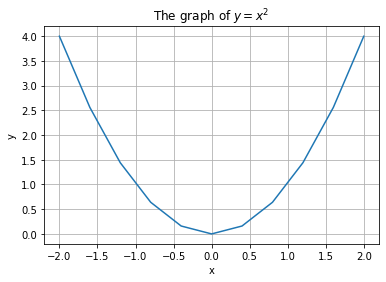

In [ ]:
%matplotlib inline
plt.plot(x_values, y_values)
plt.title('The graph of $y = x^2$')  # The dollar signs surround the formula, in LaTeX format.
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)
plt.show()


Let's analyze the graphing code a bit more.  See the [official pyplot tutorial](https://matplotlib.org/users/pyplot_tutorial.html) for more details.  
```python
%matplotlib inline
plt.plot(x_values, y_values)
plt.title('The graph of $y = x^2$')  # The dollar signs surround the formula, in LaTeX format.
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)
plt.show()
```
The first line contains the **magic** `%matplotlib inline`.  We have seen a magic word before, in `%timeit`.  [Magic words](http://ipython.readthedocs.io/en/stable/interactive/magics.html) can call another program to assist.  So here, the magic `%matplotlib inline` calls matplotlib for help, and places the resulting figure within the notebook.

The next line `plt.plot(x_values, y_values)` creates a `plot object` based on the data of the x-values and y-values.  It is an abstract sort of object, behind the scenes, in a format that matplotlib understands.  The following lines set the title of the plot, the axis labels, and turns a grid on.  The last line `plt.show` renders the plot as an image in your notebook.  There's an infinite variety of graphs that matplotlib can produce -- see [the gallery](https://matplotlib.org/gallery.html) for more!  Other graphics packages include [bokeh](http://bokeh.pydata.org/en/latest/) and [seaborn](http://seaborn.pydata.org/), which extends matplotlib.

### Analysis of the prime counting function

Now, to analyze the prime counting function, let's graph it.  To make a graph, we will first need a list of many values of x and many corresponding values of $\pi(x)$.  We do this with two commands.  The first might take a minute to compute.

In [ ]:
x_values = numpy.linspace(0,1000000,1001) # The numpy array [0,1000,2000,3000,...,1000000]
pix_values = numpy.array([primes_upto(x) for x in x_values])  # [FUNCTION(x) for x in LIST] syntax

We created an array of x-values as before.  But the creation of an array of y-values (here, called `pix_values` to stand for $\pi(x)$) probably looks strange.  We have done two new things!

1.  We have used a list comprehension `[primes_upto(x) for x in x_values]` to create a **list** of y-values.
2.  We have used numpy.array(LIST) syntax to convert a Python list into a numpy array.

First, we explain the list comprehension.  Instead of pulling out values of a list according to a condition, with `[x for x in LIST if CONDITION]`, we have created a new list based on performing a function each element of a list.  The syntax, used above, is `[FUNCTION(x) for x in LIST]`.  These two methods of list comprehension can be combined, in fact.  The most general syntax for list comprehension is `[FUNCTION(x) for x in LIST if CONDITION]`.

Second, a list comprehension can be carried out on a numpy array, but the result is a plain Python list.  It will be better to have a numpy array instead for what follows, so we use the `numpy.array()` function to convert the list into a numpy array.

In [ ]:
type(numpy.array([1,2,3]))  # For example.

numpy.ndarray

Now we have two numpy arrays:  the array of x-values and the array of y-values.  We can make a plot with matplotlib.

In [ ]:
len(x_values) == len(pix_values)  # These better be the same, or else matplotlib will be unhappy.

True

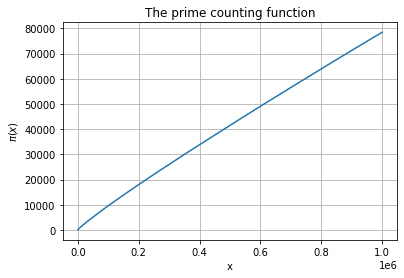

In [ ]:
%matplotlib inline
plt.plot(x_values, pix_values)
plt.title('The prime counting function')
plt.ylabel('$\pi(x)$')
plt.xlabel('x')
plt.grid(True)
plt.show()

In this range, the prime counting function might look nearly linear.  But if you look closely, there's a subtle downward bend.  This is more pronounced in smaller ranges.  For example, let's look at the first 10 x-values and y-values only.

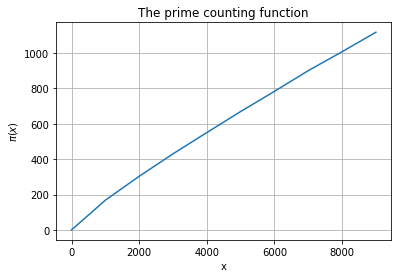

In [ ]:
%matplotlib inline
plt.plot(x_values[:10], pix_values[:10])  # Look closer to 0.
plt.title('The prime counting function')
plt.ylabel('$\pi(x)$')
plt.xlabel('x')
plt.grid(True)
plt.show()

It still looks almost linear, but there's a visible downward bend here.  How can we see this bend more clearly?  If the graph were linear, its equation would have the form $\pi(x) = mx$ for some fixed slope $m$ (since the graph *does* pass through the origin).  Therefore, the quantity $\pi(x)/x$ would be *constant* if the graph were linear.  

Hence, if we graph $\pi(x) / x$ on the y-axis and $x$ on the x-axis, and the result is nonconstant, then the function $\pi(x)$ is nonlinear.

In [ ]:
m_values = pix_values[1:] / x_values[1:]  # We start at 1, to avoid a division by zero error.

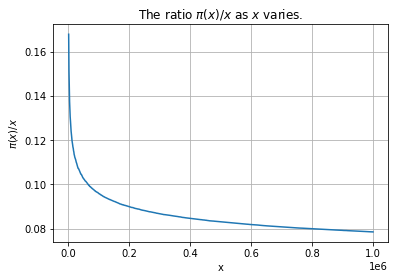

In [ ]:
%matplotlib inline
plt.plot(x_values[1:], m_values)
plt.title('The ratio $\pi(x) / x$ as $x$ varies.')
plt.xlabel('x')
plt.ylabel('$\pi(x) / x$')
plt.grid(True)
plt.show()

That is certainly not constant!  The decay of $\pi(x) / x$ is not so different from $1 / \log(x)$, in fact.  To see this, let's overlay the graphs.  We use the `numpy.log` function, which computes the natural logarithm of its input (and allows an entire array as input).

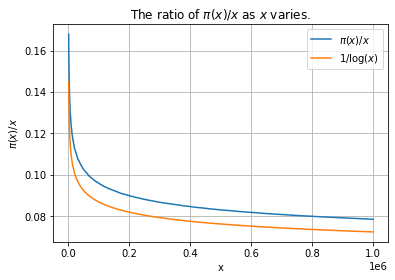

In [ ]:
%matplotlib inline
plt.plot(x_values[1:], m_values, label='$\pi(x)/x$')  # The same as the plot above.
plt.plot(x_values[1:], 1 / numpy.log(x_values[1:]), label='$1 / \log(x)$')  # Overlay the graph of 1 / log(x)
plt.title('The ratio of $\pi(x) / x$ as $x$ varies.')
plt.xlabel('x')
plt.ylabel('$\pi(x) / x$')
plt.grid(True)
plt.legend()  # Turn on the legend.
plt.show()

The shape of the decay of $\pi(x) / x$ is very close to $1 / \log(x)$, but it looks like there is an offset.  In fact, there is, and it is pretty close to $1 / \log(x)^2$.  And that is close, but again there's another little offset, this time proportional to $2 / \log(x)^3$.  This goes on forever, if one wishes to approximate $\pi(x) / x$ by an "asymptotic expansion" (not a good idea, it turns out).

The closeness of $\pi(x) / x$ to $1 / \log(x)$ is expressed in the **prime number theorem**:
$$\lim_{x \rightarrow \infty} \frac{\pi(x)}{x / \log(x)} = 1.$$

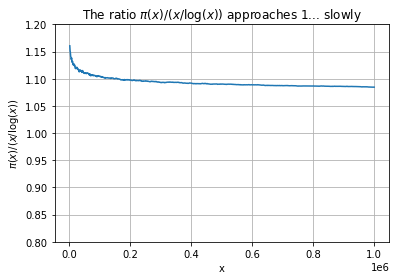

In [ ]:
%matplotlib inline
plt.plot(x_values[1:], m_values * numpy.log(x_values[1:])  )  # Should get closer to 1.
plt.title('The ratio $\pi(x) / (x / \log(x))$ approaches 1... slowly')
plt.xlabel('x')
plt.ylabel('$\pi(x) / (x / \log(x)) $')
plt.ylim(0.8,1.2)
plt.grid(True)
plt.show()

Comparing the graph to the theoretical result, we find that the ratio $\pi(x) / (x / \log(x))$ approaches $1$ (the theoretical result) but very slowly (see the graph above!).

A much stronger result relates $\pi(x)$ to the "logarithmic integral" $li(x)$.  The [Riemann hypothesis](http://www.claymath.org/millennium-problems/riemann-hypothesis) is equivalent to the statement
$$\left\vert \pi(x) - li(x) \right\vert = O(\sqrt{x} \log(x)).$$
In other words, the error if one approximates $\pi(x)$ by $li(x)$ is bounded by a constant times $\sqrt{x} \log(x)$.  The logarithmic integral function isn't part of Python or numpy, but it is in the mpmath package.  If you have this package installed, then you can try the following.

In [ ]:
from mpmath import li

In [ ]:
print(primes_upto(1000000))  # The number of primes up to 1 million.
print(li(1000000))  # The logarithmic integral of 1 million.

78498
78627.5491594622


Not too shabby!

### Prime gaps

As a last bit of data analysis, we consider the **prime gaps**.  These are the numbers that occur as differences between consecutive primes.  Since all primes except 2 are odd, all prime gaps are even except for the 1-unit gap between 2 and 3.  There are many unsolved problems about prime gaps; the most famous might be that a gap of 2 occurs infinitely often (as in the gaps between 3,5 and between 11,13 and between 41,43, etc.).

Once we have our data set of prime numbers, it is not hard to create a data set of prime gaps.  Recall that `primes` is our list of prime numbers up to 1 million.

In [ ]:
len(primes) # The number of primes up to 1 million.

78498

In [ ]:
primes_allbutlast = primes[:-1]  # This excludes the last prime in the list.
primes_allbutfirst = primes[1:]  # This excludes the first (i.e., with index 0) prime in the list.

In [ ]:
primegaps = numpy.array(primes_allbutfirst) - numpy.array(primes_allbutlast) # Numpy is fast!

In [ ]:
print(primegaps[:100])  # The first hundred prime gaps!

[ 1  2  2  4  2  4  2  4  6  2  6  4  2  4  6  6  2  6  4  2  6  4  6  8
  4  2  4  2  4 14  4  6  2 10  2  6  6  4  6  6  2 10  2  4  2 12 12  4
  2  4  6  2 10  6  6  6  2  6  4  2 10 14  4  2  4 14  6 10  2  4  6  8
  6  6  4  6  8  4  8 10  2 10  2  6  4  6  8  4  2  4 12  8  4  8  4  6
 12  2 18  6]


What have we done?  It is useful to try out this method on a short list.  

In [ ]:
L = [1,3,7,20]  # A nice short list.

In [ ]:
print(L[:-1])
print(L[1:])

[1, 3, 7]
[3, 7, 20]


Now we have two lists of the same length.  The gaps in the original list `L` are the differences between terms of the *same* index in the two new lists.  One might be tempted to just subtract, e.g., with the command `L[1:] - L[:-1]`, but subtraction is not defined for lists.

Fortunately, by converting the lists to numpy arrays, we can use numpy's term-by-term subtraction operation.

In [ ]:
L[1:] - L[:-1]  # This will give a TypeError.  You can't subtract lists!

TypeError: ignored

In [ ]:
numpy.array(L[1:]) - numpy.array(L[:-1])  # That's better.  See the gaps in the list [1,3,7,20] in the output.

array([ 2,  4, 13])

Now let's return to our primegaps data set.  It contains all the gap-sizes for primes up to 1 million.  

In [ ]:
print(len(primes))
print(len(primegaps))  # This should be one less than the number of primes.

78498
78497


As a last example of data visualization, we use matplotlib to produce a histogram of the prime gaps.

In [ ]:
max(primegaps)  # The largest prime gap that appears!

114

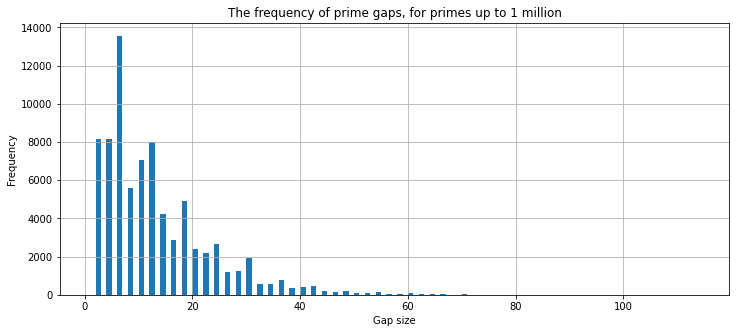

In [ ]:
%matplotlib inline
plt.figure(figsize=(12, 5))  #  Makes the resulting figure 12in by 5in.
plt.hist(primegaps, bins=range(1,115)) #  Makes a histogram with one bin for each possible gap from 1 to 114.
plt.ylabel('Frequency')
plt.xlabel('Gap size')
plt.grid(True)
plt.title('The frequency of prime gaps, for primes up to 1 million')
plt.show()

Observe that gaps of 2 (twin primes) are pretty frequent.  There are over 8000 of them, and about the same number of 4-unit gaps!  But gaps of 6 are most frequent in the population, and there are some interesting peaks at 6, 12, 18, 24, 30.  What else do you observe?

There seems to be a "peak" every 3 bars. 

### Exercises

####1. 
Create functions `redprimes_upto(x)` and `blueprimes_upto(x)` which count the number of red/blue primes up to a given number `x`.  Recall that we defined red/blue primes to be those of the form 4n+1 or 4n+3, respectively.  Graph the relative proportion of red/blue primes as `x` varies from 1 to 1 million.  E.g., are the proportions 50%/50% or 70%/30%, and how do these proportions change?  Note:  this is also visualized in [An Illustrated Theory of Numbers](http://bookstore.ams.org/mbk-105) and you can read [an article by Rubinstein and Sarnak](https://projecteuclid.org/euclid.em/1048515870) for more.
****

On the nature of Doctor Seuss rhymes and colored primes, we can say that the true beauty of the rhyme
```
One fish,
Two fish,
Red fish,
Blue fish.
```
lies in the rhyming of two and blue. As such, since 2 is the only even prime, and we will mostly be studying primes ending in 3, I would like to petition to chage the terminology of "blue primes" to "green primes," such that the rhyme may go as follows:
```
# This is formatted as code
```




Pulling in code from notebook prior,

In [ ]:
def isprime_list(n):
    ''' 
    Return a list of length n+1
    with Trues at prime indices and Falses at composite indices.
    '''
    flags = [True] * (n+1)  # A list [True, True, True,...] to start.
    flags[0] = False  # Zero is not prime.  So its flag is set to False.
    flags[1] = False  # One is not prime.  So its flag is set to False.
    flags[4::2] = [False] * ((n-2)//2)
    p = 3
    while p <= sqrt(n):  # We only need to sieve by p is p <= sqrt(n).
        if flags[p]:  # We sieve the multiples of p if flags[p]=True.
            flags[p*p::2*p] = [False] * ((n-p*p)//(2*p)+1) # Sieves out multiples of p, starting at p*p.
        p = p + 2 # Try the next value of p.
        
    return flags
    
primes = where(isprime_list(1000000))

def primes_upto(x):
    return len([p for p in primes if p <= x]) # List comprehension recovers the primes up to x.

oneprimes = [p for p in primes[0:1]]
twoprimes = [p for p in primes[0:2]]
redprimes = [p for p in primes if p%4 == 1] # Note the [x for x in LIST if CONDITION] syntax.
blueprimes = [p for p in primes if p%4 == 3]

Defining counting functions,

In [ ]:
def redprimes_upto(x):
    return len([r for r in redprimes if r <= x])
    
def blueprimes_upto(x):
    return len([b for b in blueprimes if b <= x])

Importing programs,

In [ ]:
import matplotlib  #  A powerful graphics package.
import numpy  #  A math package
import matplotlib.pyplot as plt  # A plotting subpackage in matplotlib.

Defining domain and ranges,

In [ ]:
x_values = numpy.linspace(0,1000000,1001) # The numpy array [0,1000,2000,3000,...,1000000]
percentred = numpy.array([redprimes_upto(x)/primes_upto(x) for x in x_values[1:]])
percentblue = numpy.array([blueprimes_upto(x)/primes_upto(x) for x in x_values[1:]])

And, finally, the graph,

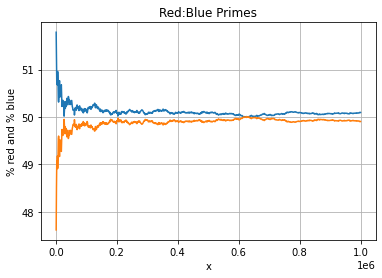

In [ ]:
%matplotlib inline
plt.plot(x_values[1:], percentblue*100)
plt.plot(x_values[1:], percentred*100)
plt.title('Red:Blue Primes')
plt.xlabel('x')
plt.ylabel('% red and % blue')
plt.grid(True)
plt.show()

There seems to be consistantly more blue than red but the ration is very close to 50:50.

####2.
Does there seem to be a bias in the last digits of primes?  Note that, except for 2 and 5, every prime ends in 1,3,7, or 9.  Note: the last digit of a number `n` is obtained from `n % 10`.
****  

Generating lists,

In [ ]:
oneprimes = [p for p in primes if p%10 == 1]
threeprimes = [p for p in primes if p%10 == 3]
sevenprimes = [p for p in primes if p%10 == 7]
nineprimes = [p for p in primes if p%10 == 9]

I made a general upto function so I don't need to write multiple this time,

In [ ]:
def upto(x,values):
    return len([v for v in values if v <= x])

Defining domain and ranges,

In [ ]:
x_values = numpy.linspace(0,1000000,1001) # The numpy array [0,1000,2000,3000,...,1000000]

In [ ]:
percentone = numpy.array([upto(x,oneprimes)/primes_upto(x) for x in x_values[1:]])
percentthree = numpy.array([upto(x,threeprimes)/primes_upto(x) for x in x_values[1:]])
percentseven = numpy.array([upto(x,sevenprimes)/primes_upto(x) for x in x_values[1:]])
percentnine = numpy.array([upto(x,nineprimes)/primes_upto(x) for x in x_values[1:]])

And, the graph,

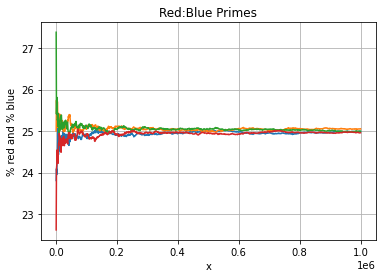

In [ ]:
%matplotlib inline
plt.plot(x_values[1:], percentone*100)
plt.plot(x_values[1:], percentthree*100)
plt.plot(x_values[1:], percentseven*100)
plt.plot(x_values[1:], percentnine*100)
plt.title('Red:Blue Primes')
plt.xlabel('x')
plt.ylabel('% red and % blue')
plt.grid(True)
plt.show()

They seem to be roughly focused around 25%, similiar to how red an blue primes split about 50:50. Which is to be expected, since the distribution should be random.

####3.
Read about the ["Prime Conspiracy"](https://www.quantamagazine.org/mathematicians-discover-prime-conspiracy-20160313), recently discovered by Lemke Oliver and Soundararajan.  Can you detect their conspiracy in our data set of primes?
****

The simplest way to detect this bias is to look in the prime gaps funciton. A quick look at the graph shows a large bais towards smaller values, and a large bais towards multiples of $6$. 

The bais away from values of the same last digit can be seen there, since only values $0\mod10$ will result in the same following number.

To check this, I'll pull the prime gaps array we have from earlier,

In [ ]:
primes_allbutlast = primes[:-1]  # This excludes the last prime in the list.
primes_allbutfirst = primes[1:]  # This excludes the first (i.e., with index 0) prime in the list.
primegaps = numpy.array(primes_allbutfirst) - numpy.array(primes_allbutlast) # Numpy is fast!

And check for the percent that is $0\mod10$,

In [ ]:
mod10 = [x for x in primegaps if x%10 == 0]
len(mod10)/len(primegaps)*100

15.352179064168055

So, outright, we have only $15\%$ of primes are followed by a prime with the same last digit, which is too far off $25\%$ to be considered as simply error.

Too look at this a bit more closely, I'm gonna construct a dictionary for primes and the gap to the next prime.

In [ ]:
primegapdict={}
for x in range(len(primegaps)):#I'm going to run this loop of gaps, since it is one shorter in length
  primegapdict.update({primes[x]:primegaps[x]})  

In [ ]:
pgdict = {primes[j] : primegaps[j] for j in range(len(primegaps))}

In [ ]:
print('.',end='')
for x in primes[:10]:
  print('{}'.format(x),end='')
  for y in range(primegapdict[x]-1):
    print('.',end='')

.23.5.7...11.13...17.19...23.....29.

Now, I'm going to draw out some data.

Starting with primes that end in $1$,

if the gap is $2\mod10$, it is followed by $3$,

the gap can't be $4\mod10$,

if the gap is $6\mod10$, it is followed by $7$,

if the gap is $8\mod10$, it is followed by $9$,

and if the gap is $0\mod10$, it is followed by $1$.

In [ ]:
def clear_list(list):
  '''
  Clears a list of all None bools.
  '''
  clearlist = [x for x in list if x != None]
  return clearlist

In [ ]:
one_mod10dict = {0:[None]*(upto(1000000,primes)//3),2:[None]*(upto(1000000,primes)//3),4:[],6:[None]*(upto(1000000,primes)//3),8:[None]*(upto(1000000,primes)//3)}

indextrack = [False]*11 

for p in oneprimes:
  for val in one_mod10dict:
    if primegapdict[p] % 10 == val:
      one_mod10dict[val][indextrack[val]] = p
      indextrack[val] += 1

for x in one_mod10dict:
 one_mod10dict[x] = clear_list(one_mod10dict[x])

In [ ]:
one_mod10dict[0][:10]

[181, 241, 421, 631, 691, 811, 1021, 1051, 1171, 1471]

In [ ]:
for val in one_mod10dict:
  percentval = len(one_mod10dict[val])/len(oneprimes)
  print('{}% of values 1 mod 10 are followed by {} mod 10'.format(percentval,1+val))

0.16378651169903655% of values 1 mod 10 are followed by 1 mod 10
0.32109904674517% of values 1 mod 10 are followed by 3 mod 10
0.0% of values 1 mod 10 are followed by 5 mod 10
0.33389407146862415% of values 1 mod 10 are followed by 7 mod 10
0.1812203700871693% of values 1 mod 10 are followed by 9 mod 10


And, such, I have found the bais for 1. I will now duplicate this code for 3, 7, 9.

I'm removing $999,983$ from threeprimes because we don't have the primegap value for it, and it's far easier to ignore it than calculate it.

In [ ]:
threeprimes.remove(999983)

In [ ]:
three_mod10dict = {0:[None]*(upto(1000000,primes)//4),2:[None],4:[None]*(upto(1000000,primes)//4),6:[None]*(upto(1000000,primes)//4),8:[None]*(upto(1000000,primes)//4)}

indextrack = [False]*11 

for p in threeprimes:
  for val in three_mod10dict:
    if primegapdict[p] % 10 == val:
      three_mod10dict[val][indextrack[val]] = p
      indextrack[val] += 1

for x in three_mod10dict:
 three_mod10dict[x] = clear_list(three_mod10dict[x])

In [ ]:
seven_mod10dict = {0:[None]*(upto(1000000,primes)//4),2:[None]*(upto(1000000,primes)//4),4:[None]*(upto(1000000,primes)//4),6:[None]*(upto(1000000,primes)//4),8:[]}

indextrack = [False]*11 

for p in sevenprimes:
  for val in seven_mod10dict:
    if primegapdict[p] % 10 == val:
      seven_mod10dict[val][indextrack[val]] = p
      indextrack[val] += 1

for x in seven_mod10dict:
 seven_mod10dict[x] = clear_list(seven_mod10dict[x])

In [ ]:
nine_mod10dict = {0:[None]*(upto(1000000,primes)//4),2:[None]*(upto(1000000,primes)//4),4:[None]*(upto(1000000,primes)//4),6:[],8:[None]*(upto(1000000,primes)//4)}

indextrack = [False]*11 

for p in nineprimes:
  for val in nine_mod10dict:
    if primegapdict[p] % 10 == val:
      nine_mod10dict[val][indextrack[val]] = p
      indextrack[val] += 1

for x in nine_mod10dict:
 nine_mod10dict[x] = clear_list(nine_mod10dict[x])

In [ ]:
for val in three_mod10dict:
  percentval = len(three_mod10dict[val])/len(threeprimes)
  print('{}% of values 3 mod 10 are followed by {} mod 10'.format(percentval,(3+val)%10))

print()

for val in seven_mod10dict:
  percentval = len(seven_mod10dict[val])/len(sevenprimes)
  print('{}% of values 7 mod 10 are followed by {} mod 10'.format(percentval,(7+val)%10))

print()

for val in nine_mod10dict:
  percentval = len(nine_mod10dict[val])/len(nineprimes)
  print('{}% of values 9 mod 10 are followed by {} mod 10'.format(percentval,(9+val)%10))

0.14289346554792778% of values 3 mod 10 are followed by 3 mod 10
5.0851767098906685e-05% of values 3 mod 10 are followed by 5 mod 10
0.295906432748538% of values 3 mod 10 are followed by 7 mod 10
0.33801169590643276% of values 3 mod 10 are followed by 9 mod 10
0.22308670226290364% of values 3 mod 10 are followed by 1 mod 10

0.14642474899342542% of values 7 mod 10 are followed by 7 mod 10
0.3178227409408287% of values 7 mod 10 are followed by 9 mod 10
0.25834565006880383% of values 7 mod 10 are followed by 1 mod 10
0.27740685999694203% of values 7 mod 10 are followed by 3 mod 10
0.0% of values 7 mod 10 are followed by 5 mod 10

0.16102689736130252% of values 9 mod 10 are followed by 9 mod 10
0.354616444648599% of values 9 mod 10 are followed by 1 mod 10
0.26090950849793293% of values 9 mod 10 are followed by 3 mod 10
0.0% of values 9 mod 10 are followed by 5 mod 10
0.22344714949216557% of values 9 mod 10 are followed by 7 mod 10


Office Hours:

In [ ]:
ptenlist = [p%10 for p in primes] # Make an ordered list of primes mod 10
pgtenlist = [(ptenlist[j+1] - ptenlist[j])%10 for j in range(len(ptenlist)-1)] # Make an ordered list of gaps modulo 10 from list 
pairlist = [(ptenlist[j],ptenlist[j+1]) for j in range(len(ptenlist)-1)] # Make a list of pairs of prime pairs.

In [ ]:
pairlist.count((1,1)) # Checking the list for pairs of (1,1) gives all times 1 is followed by 1.

3213

In [ ]:
pairlist.count((1,1))/ptenlist.count(1) # And checking the orginal list for 1s gives

0.16378651169903655